In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csvfile = pd.read_csv("Resources/directory.csv")

csvfile

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79


In [2]:
csvfile.columns

Index(['Brand', 'Store Number', 'Store Name', 'Ownership Type',
       'Street Address', 'City', 'State/Province', 'Country', 'Postcode',
       'Phone Number', 'Timezone', 'Longitude', 'Latitude'],
      dtype='object')

In [3]:

cleaned_df = csvfile[{"Store Name","Ownership Type","Street Address","City","State/Province","Country","Postcode"}]
cleaned_df.head()

,Ownership Type,State/Province,Postcode,Store Name,Street Address,Country,City
0,Licensed,7,AD500,"Meritxell, 96","Av. Meritxell, 96",AD,Andorra la Vella
1,Licensed,AJ,NaN,Ajman Drive Thru,"1 Street 69, Al Jarf",AE,Ajman
2,Licensed,AJ,NaN,Dana Mall,Sheikh Khalifa Bin Zayed St.,AE,Ajman
3,Licensed,AZ,NaN,Twofour 54,Al Salam Street,AE,Abu Dhabi
4,Licensed,AZ,NaN,Al Ain Tower,"Khaldiya Area, Abu Dhabi Island",AE,Abu Dhabi


In [4]:
new_df = cleaned_df.loc[cleaned_df["Country"] == "US", :]
new_df

,Ownership Type,State/Province,Postcode,Store Name,Street Address,Country,City
11964,Licensed,AK,995042300,Safeway-Anchorage #1809,5600 Debarr Rd Ste 9,US,Anchorage
11965,Licensed,AK,995073444,Safeway-Anchorage #2628,1725 Abbott Rd,US,Anchorage
11966,Licensed,AK,995153596,Safeway - Anchorage #1813,1501 Huffman Rd,US,Anchorage
11967,Company Owned,AK,99515,100th & C St - Anchorage,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",US,Anchorage
11968,Company Owned,AK,995152050,Old Seward & Diamond,1005 E Dimond Blvd,US,Anchorage
...,...,...,...,...,...,...,...
25567,Licensed,WY,820723012,Safeway-Laramie #2466,554 N 3rd St,US,Laramie
25568,Licensed,WY,820705141,Ridley's - Laramie #1131,3112 E. Grand,US,Laramie
25569,Company Owned,WY,82070,Laramie - Grand & 30th,3021 Grand Ave,US,Laramie
25570,Company Owned,WY,829015751,I-80 & Dewar Dr-Rock Springs,118 Westland Way,US,Rock Springs


In [5]:
new_df['Zip_Code'] = new_df['Postcode'].where(new_df['Postcode'].str.len() == 5, 
                                               new_df['Postcode'].str[:5])

/Users/AnaLindaPenny/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
new_df

,Ownership Type,State/Province,Postcode,Store Name,Street Address,Country,City,Zip_Code
11964,Licensed,AK,995042300,Safeway-Anchorage #1809,5600 Debarr Rd Ste 9,US,Anchorage,99504
11965,Licensed,AK,995073444,Safeway-Anchorage #2628,1725 Abbott Rd,US,Anchorage,99507
11966,Licensed,AK,995153596,Safeway - Anchorage #1813,1501 Huffman Rd,US,Anchorage,99515
11967,Company Owned,AK,99515,100th & C St - Anchorage,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",US,Anchorage,99515
11968,Company Owned,AK,995152050,Old Seward & Diamond,1005 E Dimond Blvd,US,Anchorage,99515
...,...,...,...,...,...,...,...,...
25567,Licensed,WY,820723012,Safeway-Laramie #2466,554 N 3rd St,US,Laramie,82072
25568,Licensed,WY,820705141,Ridley's - Laramie #1131,3112 E. Grand,US,Laramie,82070
25569,Company Owned,WY,82070,Laramie - Grand & 30th,3021 Grand Ave,US,Laramie,82070
25570,Company Owned,WY,829015751,I-80 & Dewar Dr-Rock Springs,118 Westland Way,US,Rock Springs,82901


In [7]:
sb_df = new_df[{"Store Name","Ownership Type","Street Address","City","State/Province","Country","Zip_Code"}]

In [8]:
sb_df

,Ownership Type,State/Province,Store Name,Zip_Code,Street Address,Country,City
11964,Licensed,AK,Safeway-Anchorage #1809,99504,5600 Debarr Rd Ste 9,US,Anchorage
11965,Licensed,AK,Safeway-Anchorage #2628,99507,1725 Abbott Rd,US,Anchorage
11966,Licensed,AK,Safeway - Anchorage #1813,99515,1501 Huffman Rd,US,Anchorage
11967,Company Owned,AK,100th & C St - Anchorage,99515,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",US,Anchorage
11968,Company Owned,AK,Old Seward & Diamond,99515,1005 E Dimond Blvd,US,Anchorage
...,...,...,...,...,...,...,...
25567,Licensed,WY,Safeway-Laramie #2466,82072,554 N 3rd St,US,Laramie
25568,Licensed,WY,Ridley's - Laramie #1131,82070,3112 E. Grand,US,Laramie
25569,Company Owned,WY,Laramie - Grand & 30th,82070,3021 Grand Ave,US,Laramie
25570,Company Owned,WY,I-80 & Dewar Dr-Rock Springs,82901,118 Westland Way,US,Rock Springs


In [9]:
nc_sb_df = sb_df.loc[sb_df["State/Province"] == "NC", :]
nc_sb_df.head()

,Ownership Type,State/Province,Store Name,Zip_Code,Street Address,Country,City
19830,Company Owned,NC,"Aberdeen, NC",28315,110 Columbus Drive,US,Aberdeen
19831,Licensed,NC,Harris Teeter-Apex #58,27502,750 W Williams St,US,Apex
19832,Licensed,NC,Kroger-Apex #357,27523,940 US Hwy 64,US,Apex
19833,Licensed,NC,Super Target Apex ST-1932,27502,1201 Beaver Creek Commons Dr,US,Apex
19834,Licensed,NC,Target Asheville T-2011,28704,15 McKenna Rd,US,Arden


In [10]:
nc_sb_df

,Ownership Type,State/Province,Store Name,Zip_Code,Street Address,Country,City
19830,Company Owned,NC,"Aberdeen, NC",28315,110 Columbus Drive,US,Aberdeen
19831,Licensed,NC,Harris Teeter-Apex #58,27502,750 W Williams St,US,Apex
19832,Licensed,NC,Kroger-Apex #357,27523,940 US Hwy 64,US,Apex
19833,Licensed,NC,Super Target Apex ST-1932,27502,1201 Beaver Creek Commons Dr,US,Apex
19834,Licensed,NC,Target Asheville T-2011,28704,15 McKenna Rd,US,Arden
...,...,...,...,...,...,...,...
20163,Company Owned,NC,Hanes Mall Blvd.,27103,2015 Frontis Plaza Boulevard,US,Winston-Salem
20164,Company Owned,NC,Stratford Road,27103,"110 Oakwood Drive, Space U122, N/A",US,Winston-Salem
20165,Company Owned,NC,Reynolda Road,27106,2898 Reynolda Road,US,Winston-Salem
20166,Licensed,NC,Wake Forest University Z. Smith Rey,27109,1834 Wake Forest Rd,US,Winston-Salem


In [11]:
nc_zipcodes = pd.read_csv("nczipcodes.csv")
nc_zipcodes

,Zip_Code,City,State,County Name
0,28315,ABERDEEN,NC,MOORE
1,27006,ADVANCE,NC,DAVIE
2,27910,AHOSKIE,NC,HERTFORD
3,27201,ALAMANCE,NC,ALAMANCE
4,28001,ALBEMARLE,NC,STANLY
...,...,...,...,...
1041,27379,YANCEYVILLE,NC,CASWELL
1042,27596,YOUNGSVILLE,NC,FRANKLIN
1043,27597,ZEBULON,NC,WAKE
1044,28698,ZIONVILLE,NC,WATAUGA


In [12]:
nc_zipcodes.dtypes

Zip_Code        int64
City           object
State          object
County Name    object
dtype: object

In [13]:
nc_zipcodes['Zip_Code'] = nc_zipcodes['Zip_Code'].apply(str)

In [14]:
merge_df = pd.merge(nc_sb_df, nc_zipcodes, on="Zip_Code", how="inner")
merge_df

,Ownership Type,State/Province,Store Name,Zip_Code,Street Address,Country,City_x,City_y,State,County Name
0,Company Owned,NC,"Aberdeen, NC",28315,110 Columbus Drive,US,Aberdeen,ABERDEEN,NC,MOORE
1,Licensed,NC,Harris Teeter-Apex #58,27502,750 W Williams St,US,Apex,APEX,NC,WAKE
2,Licensed,NC,Super Target Apex ST-1932,27502,1201 Beaver Creek Commons Dr,US,Apex,APEX,NC,WAKE
3,Licensed,NC,Kroger-Apex #357,27523,940 US Hwy 64,US,Apex,APEX,NC,WAKE
4,Licensed,NC,Target Asheville T-2011,28704,15 McKenna Rd,US,Arden,ARDEN,NC,BUNCOMBE
...,...,...,...,...,...,...,...,...,...,...
333,Licensed,NC,Target Winston-Salem North T-1077,27105,5420 University Pkwy,US,Winston-Salem,WINSTON SALEM,NC,FORSYTH
334,Licensed,NC,Harris Teeter Winston Salem # 346,27106,2835 Reynolda Rd,US,Winston-Salem,WINSTON SALEM,NC,FORSYTH
335,Company Owned,NC,Mt. Tabor Place,27106,3327 Robinhood Road,US,Winston-Salem,WINSTON SALEM,NC,FORSYTH
336,Company Owned,NC,Reynolda Road,27106,2898 Reynolda Road,US,Winston-Salem,WINSTON SALEM,NC,FORSYTH


In [15]:
new_nc_sb_df = merge_df[{"Country","Store Name","Ownership Type",
                         "Street Address","City_y","State","Country","Zip_Code","County Name"}]
new_nc_sb_df

,Ownership Type,County Name,State,Store Name,Zip_Code,City_y,Street Address,Country
0,Company Owned,MOORE,NC,"Aberdeen, NC",28315,ABERDEEN,110 Columbus Drive,US
1,Licensed,WAKE,NC,Harris Teeter-Apex #58,27502,APEX,750 W Williams St,US
2,Licensed,WAKE,NC,Super Target Apex ST-1932,27502,APEX,1201 Beaver Creek Commons Dr,US
3,Licensed,WAKE,NC,Kroger-Apex #357,27523,APEX,940 US Hwy 64,US
4,Licensed,BUNCOMBE,NC,Target Asheville T-2011,28704,ARDEN,15 McKenna Rd,US
...,...,...,...,...,...,...,...,...
333,Licensed,FORSYTH,NC,Target Winston-Salem North T-1077,27105,WINSTON SALEM,5420 University Pkwy,US
334,Licensed,FORSYTH,NC,Harris Teeter Winston Salem # 346,27106,WINSTON SALEM,2835 Reynolda Rd,US
335,Company Owned,FORSYTH,NC,Mt. Tabor Place,27106,WINSTON SALEM,3327 Robinhood Road,US
336,Company Owned,FORSYTH,NC,Reynolda Road,27106,WINSTON SALEM,2898 Reynolda Road,US


In [16]:
sb_owner_counts = new_nc_sb_df["Ownership Type"].value_counts()
sb_owner_counts.head()

Licensed         186
Company Owned    152
Name: Ownership Type, dtype: int64

In [17]:
sb_zip_counts = new_nc_sb_df["Zip_Code"].value_counts()
sb_zip_counts

28208    10
28277    10
27103     8
27410     8
28027     7
         ..
27948     1
28034     1
28731     1
28557     1
28714     1
Name: Zip_Code, Length: 152, dtype: int64

In [18]:
sb_city_counts = new_nc_sb_df["City_y"].value_counts()
sb_city_counts

CHARLOTTE         61
RALEIGH           27
GREENSBORO        19
CARY              17
WINSTON SALEM     15
                  ..
BLACK MOUNTAIN     1
SANFORD            1
SWANNANOA          1
MILLS RIVER        1
DALLAS             1
Name: City_y, Length: 86, dtype: int64

In [200]:
city_counts = new_nc_sb_df['City_y'].nunique()
total_city_count_df = pd.DataFrame({'Total Cities in NC': city_counts}, index=[0])

total_city_count_df.head()


,Total Cities in NC
0,86


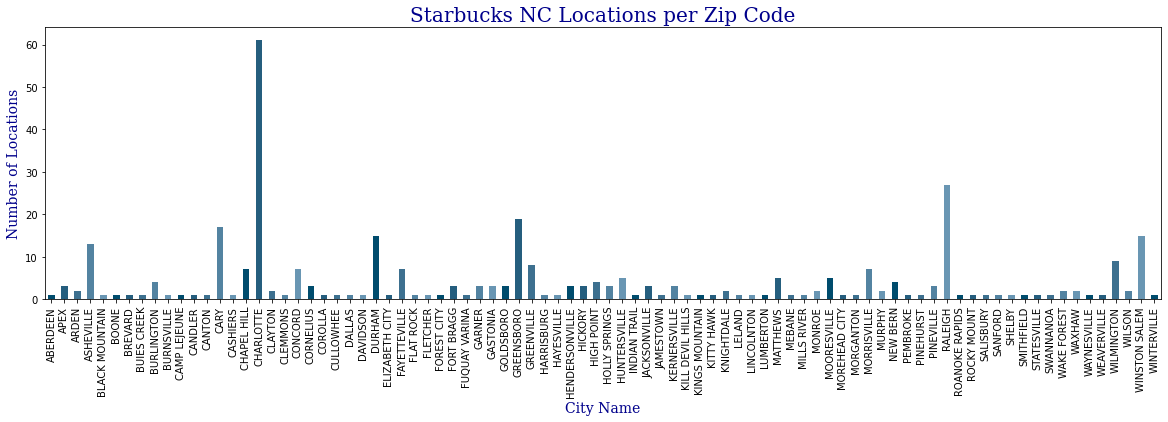

In [147]:
# Generate a bar plot showing the total number of Starbucks locations per Zip_Code using pandas
locations_per_City_y_data_points = new_nc_sb_df.groupby(['City_y']).count()['Zip_Code']
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3']

locations_per_City_y_data_points.plot(kind='bar', figsize=(20,5), color=colors)

font1 = {'family':'serif','color':'darkblue','size':20}
font2 = {'family':'serif','color':'darkblue','size':14}

plt.title('Starbucks NC Locations per Zip Code', fontdict = font1)
plt.xlabel('City Name', fontdict = font2)
plt.ylabel('Number of Locations', fontdict = font2)

plt.show()

In [20]:
nc_county_count = new_nc_sb_df.groupby(["County Name"]).count()["Zip_Code"]
nc_county_count

County Name
ALAMANCE         5
BRUNSWICK        1
BUNCOMBE        19
BURKE            1
CABARRUS         8
CARTERET         1
CATAWBA          3
CHEROKEE         2
CLAY             1
CLEVELAND        2
CRAVEN           4
CUMBERLAND      10
CURRITUCK        1
DARE             2
DURHAM          15
FORSYTH         19
GASTON           4
GUILFORD        24
HALIFAX          1
HARNETT          1
HAYWOOD          2
HENDERSON        6
IREDELL          6
JACKSON          2
JOHNSTON         3
LEE              1
LINCOLN          1
MECKLENBURG     76
MOORE            2
NASH             1
NEW HANOVER      9
ONSLOW           4
ORANGE           7
PASQUOTANK       1
PITT             9
ROBESON          2
ROWAN            1
RUTHERFORD       1
TRANSYLVANIA     1
UNION            7
WAKE            65
WATAUGA          1
WAYNE            3
WILSON           2
YANCEY           1
Name: Zip_Code, dtype: int64

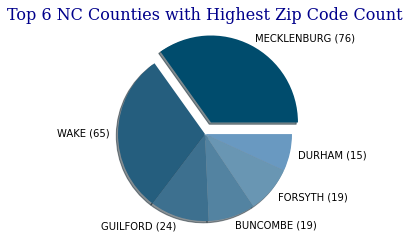

In [144]:
# Generate a pie plot showing the Top 6 Counties with highest Zip Codes count using pyplot
mylabels = ["MECKLENBURG (76)",
            "WAKE (65)", 
            "GUILFORD (24)", 
            "BUNCOMBE (19)", 
            "FORSYTH (19)",
            "DURHAM (15)"
]

myexplode = [0.15, 0, 0, 0, 0, 0]
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3','#6999c1']
font1 = {'family':'serif','color':'darkblue','size':16}

y = np.array([76, 65, 24, 19, 19, 15])

plt.pie(y, labels=mylabels, explode=myexplode, colors=colors, shadow=True)
plt.title('Top 6 NC Counties with Highest Zip Code Count', fontdict = font1)
plt.show()

In [22]:
nc_countygroup = new_nc_sb_df.groupby(["County Name"])
nc_countygroup.head()

,Ownership Type,County Name,State,Store Name,Zip_Code,City_y,Street Address,Country
0,Company Owned,MOORE,NC,"Aberdeen, NC",28315,ABERDEEN,110 Columbus Drive,US
1,Licensed,WAKE,NC,Harris Teeter-Apex #58,27502,APEX,750 W Williams St,US
2,Licensed,WAKE,NC,Super Target Apex ST-1932,27502,APEX,1201 Beaver Creek Commons Dr,US
3,Licensed,WAKE,NC,Kroger-Apex #357,27523,APEX,940 US Hwy 64,US
4,Licensed,BUNCOMBE,NC,Target Asheville T-2011,28704,ARDEN,15 McKenna Rd,US
...,...,...,...,...,...,...,...,...
315,Licensed,NEW HANOVER,NC,Harris Teeter-Wilmington # 301,28403,WILMINGTON,1940 Eastwood Rd,US
316,Company Owned,NEW HANOVER,NC,S College Dr & New Centre Dr,28403,WILMINGTON,"311 S College Dr, Ste 100",US
321,Company Owned,WILSON,NC,"Wilson, NC",27896,WILSON,"3401 Raleigh Rd, Suite 101",US
322,Licensed,WILSON,NC,Target Wilson T-2168,27896,WILSON,3401 Raleigh Rd Pkwy W,US


In [23]:
new_nc_sb_df.dtypes

Ownership Type    object
County Name       object
State             object
Store Name        object
Zip_Code          object
City_y            object
Street Address    object
Country           object
dtype: object

In [24]:
comp_own_df = new_nc_sb_df.loc[new_nc_sb_df["Ownership Type"] == "Company Owned", :]
comp_own_df.head()

,Ownership Type,County Name,State,Store Name,Zip_Code,City_y,Street Address,Country
0,Company Owned,MOORE,NC,"Aberdeen, NC",28315,ABERDEEN,110 Columbus Drive,US
9,Company Owned,BUNCOMBE,NC,Asheville Mall,28805,ASHEVILLE,3 S Tunnel Road,US
10,Company Owned,BUNCOMBE,NC,Long Shoals Rd & I-26,28803,ASHEVILLE,"26 Carl Alwin Place, 10",US
12,Company Owned,BUNCOMBE,NC,Biltmore Village,28803,ASHEVILLE,"40 All Souls Crescent Street, Biltmore Village...",US
13,Company Owned,BUNCOMBE,NC,Parkway Centre,28803,ASHEVILLE,1378 Hendersonville Road,US


In [25]:
lic_own_df = new_nc_sb_df.loc[new_nc_sb_df["Ownership Type"] == "Licensed", :]
lic_own_df.head()

,Ownership Type,County Name,State,Store Name,Zip_Code,City_y,Street Address,Country
1,Licensed,WAKE,NC,Harris Teeter-Apex #58,27502,APEX,750 W Williams St,US
2,Licensed,WAKE,NC,Super Target Apex ST-1932,27502,APEX,1201 Beaver Creek Commons Dr,US
3,Licensed,WAKE,NC,Kroger-Apex #357,27523,APEX,940 US Hwy 64,US
4,Licensed,BUNCOMBE,NC,Target Asheville T-2011,28704,ARDEN,15 McKenna Rd,US
5,Licensed,BUNCOMBE,NC,Ingles-Arden #130,28704,ARDEN,301 Long Shoals Rd,US


In [26]:
comp_own_df["City_y"].value_counts()

CHARLOTTE         29
RALEIGH           20
GREENSBORO         9
WINSTON SALEM      9
CARY               8
DURHAM             8
ASHEVILLE          6
WILMINGTON         4
CONCORD            4
FAYETTEVILLE       3
GREENVILLE         3
PINEVILLE          3
HUNTERSVILLE       3
BURLINGTON         2
CHAPEL HILL        2
HIGH POINT         2
MOORESVILLE        2
GOLDSBORO          2
HICKORY            2
MORRISVILLE        2
JACKSONVILLE       2
LUMBERTON          1
KERNERSVILLE       1
HOLLY SPRINGS      1
ABERDEEN           1
ROANOKE RAPIDS     1
WINTERVILLE        1
MOREHEAD CITY      1
WILSON             1
WAXHAW             1
CLEMMONS           1
MEBANE             1
MONROE             1
SMITHFIELD         1
KNIGHTDALE         1
FUQUAY VARINA      1
SALISBURY          1
KITTY HAWK         1
INDIAN TRAIL       1
GARNER             1
SANFORD            1
CLAYTON            1
MATTHEWS           1
HENDERSONVILLE     1
GASTONIA           1
NEW BERN           1
CORNELIUS          1
STATESVILLE  

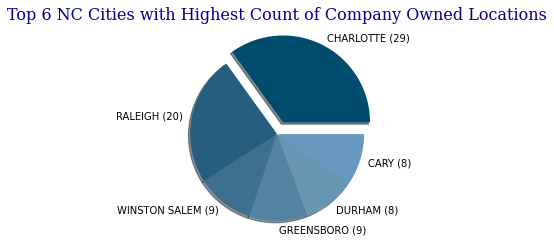

In [139]:
# Generate a pie plot showing the Top 6 NC Cities with highest count of Company Owned locations
mylabels = ["CHARLOTTE (29)",
            "RALEIGH (20)", 
            "WINSTON SALEM (9)", 
            "GREENSBORO (9)", 
            "DURHAM (8)",
            "CARY (8)"
]

myexplode = [0.15, 0, 0, 0, 0, 0]
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3', '#6999c1']
font1 = {'family':'serif','color':'darkblue','size':16}

y = np.array([29, 20, 9, 9, 8, 8])

plt.pie(y, labels=mylabels, explode=myexplode, colors=colors, shadow=True)
plt.title('Top 6 NC Cities with Highest Count of Company Owned Locations', fontdict = font1)
plt.show()

In [28]:
lic_own_df["City_y"].value_counts()

CHARLOTTE         32
GREENSBORO        10
CARY               9
DURHAM             7
ASHEVILLE          7
                  ..
WILSON             1
KINGS MOUNTAIN     1
CULLOWHEE          1
HICKORY            1
DALLAS             1
Name: City_y, Length: 71, dtype: int64

In [29]:
comp_own_df["County Name"].value_counts()

MECKLENBURG    37
WAKE           34
FORSYTH        11
GUILFORD       11
DURHAM          8
BUNCOMBE        6
CABARRUS        4
PITT            4
NEW HANOVER     4
IREDELL         3
UNION           3
ALAMANCE        3
CUMBERLAND      3
WAYNE           2
ORANGE          2
JOHNSTON        2
ONSLOW          2
CATAWBA         2
LEE             1
WILSON          1
ROWAN           1
ROBESON         1
HALIFAX         1
CARTERET        1
DARE            1
HENDERSON       1
MOORE           1
GASTON          1
CRAVEN          1
Name: County Name, dtype: int64

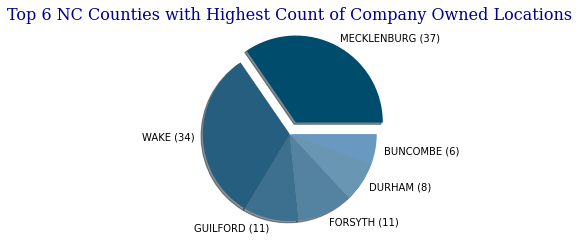

In [140]:
# Generate a pie plot showing the Top 6 NC Counties with highest count of Company Owned locations
mylabels = ["MECKLENBURG (37)",
            "WAKE (34)", 
            "GUILFORD (11)", 
            "FORSYTH (11)", 
            "DURHAM (8)",
            "BUNCOMBE (6)"
]

myexplode = [0.15, 0, 0, 0, 0, 0]
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3', '#6999c1']
font1 = {'family':'serif','color':'darkblue','size':16}

y = np.array([37,34, 11, 11, 8, 6])

plt.pie(y, labels=mylabels, explode=myexplode, colors=colors, shadow=True)
plt.title('Top 6 NC Counties with Highest Count of Company Owned Locations', fontdict = font1)
plt.show()

In [31]:
lic_own_df["County Name"].value_counts()

MECKLENBURG     39
WAKE            31
BUNCOMBE        13
GUILFORD        13
FORSYTH          8
CUMBERLAND       7
DURHAM           7
NEW HANOVER      5
PITT             5
ORANGE           5
HENDERSON        5
CABARRUS         4
UNION            4
GASTON           3
CRAVEN           3
IREDELL          3
JACKSON          2
CLEVELAND        2
CHEROKEE         2
ALAMANCE         2
ONSLOW           2
HAYWOOD          2
CURRITUCK        1
CATAWBA          1
DARE             1
JOHNSTON         1
MOORE            1
RUTHERFORD       1
TRANSYLVANIA     1
WAYNE            1
YANCEY           1
WILSON           1
BRUNSWICK        1
LINCOLN          1
BURKE            1
NASH             1
HARNETT          1
CLAY             1
PASQUOTANK       1
ROBESON          1
WATAUGA          1
Name: County Name, dtype: int64

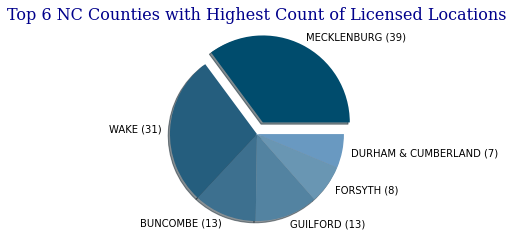

In [141]:
# Generate a pie plot showing the Top 6 NC Counties with highest count of Licensed locations
mylabels = ["MECKLENBURG (39)",
            "WAKE (31)", 
            "BUNCOMBE (13)", 
            "GUILFORD (13)", 
            "FORSYTH (8)",
            "DURHAM & CUMBERLAND (7)"
]

myexplode = [0.15, 0, 0, 0, 0, 0]
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3', '#6999c1']

y = np.array([39,31, 13, 13, 8, 7])

font1 = {'family':'serif','color':'darkblue','size':16}

plt.pie(y, labels=mylabels, explode=myexplode, colors=colors, shadow=True, )
plt.title('Top 6 NC Counties with Highest Count of Licensed Locations', fontdict = font1)
plt.show()

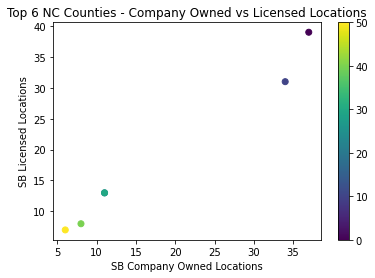

In [175]:
# Generate a scatter plot to compare the Top 6 NC Counties with highest count of Company Owned vs. Licensed locations
company_owned_locations = ["MECKLENBURG (37)",
            "WAKE (34)", 
            "GUILFORD (11)", 
            "FORSYTH (11)", 
            "DURHAM (8)",
            "BUNCOMBE (6)"
]

licensed_locations = ["MECKLENBURG (39)",
            "WAKE (31)", 
            "BUNCOMBE (13)", 
            "GUILFORD (13)", 
            "FORSYTH (8)",
            "DURHAM & CUMBERLAND (7)"
]

x = np.array([37, 34, 11, 11, 8, 6])
y = np.array([39, 31, 13, 13, 8, 7])


colors = np.array([0, 10, 20, 30, 40, 50])

plt.scatter(x, y, c=colors, cmap='viridis')
plt.colorbar()

plt.title('Top 6 NC Counties - Company Owned vs Licensed Locations')
plt.xlabel('SB Company Owned Locations')
plt.ylabel('SB Licensed Locations')
plt.show()

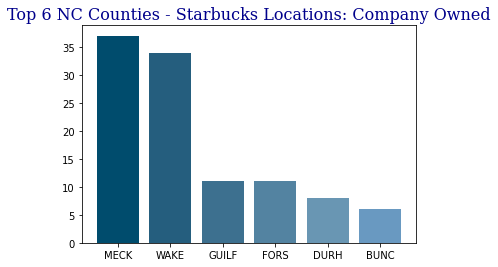

In [199]:
co_owned_locs = ['MECKLENBURG (37): MECK',
            'WAKE (34): WAKE', 
            'GUILFORD (11): GUILF', 
            'FORSYTH (11): FORS', 
            'DURHAM (8): DURH',
            'BUNCOMBE (6): BUNC'
]

x = np.array(['MECK', 'WAKE', 'GUILF', 'FORS', 'DURH', 'BUNC'])
y = np.array([37, 34, 11, 11, 8, 6])
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3', '#6999c1']
font1 = {'family':'serif','color':'darkblue','size':16}

plt.title('Top 6 NC Counties - Starbucks Locations: Company Owned', fontdict = font1)
plt.bar(x, y, color=colors)
plt.show('equal')

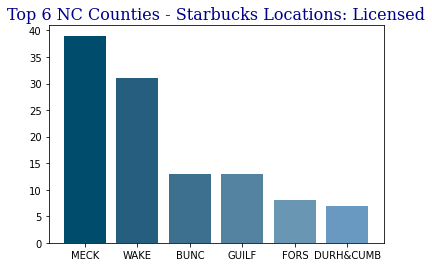

In [150]:
lic_locs = ["MECKLENBURG (39): MECK",
            "WAKE (31): WAKE", 
            "BUNCOMBE (13): BUNC", 
            "GUILFORD (13): GUILF", 
            "FORSYTH (8): FORS",
            "DURHAM & CUMBERLAND (7): DURH&CUMB"
]

x = np.array(['MECK', 'WAKE', 'BUNC', 'GUILF', 'FORS', 'DURH&CUMB'])
y = np.array([39, 31, 13, 13, 8, 7])
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3', '#6999c1']
font1 = {'family':'serif','color':'darkblue','size':16}

plt.title('Top 6 NC Counties - Starbucks Locations: Licensed', fontdict = font1)
plt.bar(x, y, color=colors)
plt.show('equal')

In [43]:
nc_zipcodes.groupby(['County Name']).count()['Zip_Code']

County Name
ALAMANCE     12
ALEXANDER     3
ALLEGHANY     6
ANSON         7
ASHE         11
             ..
WAYNE        10
WILKES       14
WILSON       10
YADKIN        5
YANCEY        3
Name: Zip_Code, Length: 100, dtype: int64

In [44]:
merge_all_df = pd.merge(nc_sb_df, nc_zipcodes, on="Zip_Code", how="outer")
merge_all_df
merge_all_df = merge_all_df[{'Street Address', 'Store Name',
       'Zip_Code', 'Ownership Type', 'City_y', 'State', 'County Name'}]

merge_all_df = merge_all_df.rename(columns={'City_y': 'City'})
merge_all_df

,Ownership Type,County Name,State,Store Name,Zip_Code,City,Street Address
0,Company Owned,MOORE,NC,"Aberdeen, NC",28315,ABERDEEN,110 Columbus Drive
1,Licensed,WAKE,NC,Harris Teeter-Apex #58,27502,APEX,750 W Williams St
2,Licensed,WAKE,NC,Super Target Apex ST-1932,27502,APEX,1201 Beaver Creek Commons Dr
3,Licensed,WAKE,NC,Kroger-Apex #357,27523,APEX,940 US Hwy 64
4,Licensed,BUNCOMBE,NC,Target Asheville T-2011,28704,ARDEN,15 McKenna Rd
...,...,...,...,...,...,...,...
1227,NaN,CASWELL,NC,NaN,27379,YANCEYVILLE,NaN
1228,NaN,FRANKLIN,NC,NaN,27596,YOUNGSVILLE,NaN
1229,NaN,WAKE,NC,NaN,27597,ZEBULON,NaN
1230,NaN,WATAUGA,NC,NaN,28698,ZIONVILLE,NaN


In [45]:
merge_all_df.columns

Index(['Ownership Type', 'County Name', 'State', 'Store Name', 'Zip_Code',
       'City', 'Street Address'],
      dtype='object')

In [46]:
all_counties = merge_all_df['County Name'].nunique(dropna=True)
all_counties

100

In [47]:
all_cities = merge_all_df['City'].nunique(dropna=True)
all_cities

750

In [48]:
all_zips = merge_all_df['Zip_Code'].nunique(dropna=True)
all_zips

1046

In [49]:
merge_all_group_county = merge_all_df.groupby('County Name').count()['Store Name']
merge_all_group_county

County Name
ALAMANCE     5
ALEXANDER    0
ALLEGHANY    0
ANSON        0
ASHE         0
            ..
WAYNE        3
WILKES       0
WILSON       2
YADKIN       0
YANCEY       1
Name: Store Name, Length: 100, dtype: int64

In [50]:
merge_all_group_city = merge_all_df.groupby('City').count()['Store Name']
merge_all_group_city

City
ABERDEEN       1
ADVANCE        0
AHOSKIE        0
ALAMANCE       0
ALBEMARLE      0
              ..
YANCEYVILLE    0
YOUNGSVILLE    0
ZEBULON        0
ZIONVILLE      0
ZIRCONIA       0
Name: Store Name, Length: 750, dtype: int64

In [51]:
merge_all_group_zips = merge_all_df.groupby('Zip_Code').count()['Store Name']
merge_all_group_zips

Zip_Code
27006    0
27007    0
27009    0
27010    0
27011    0
        ..
28902    0
28904    1
28905    0
28906    2
28909    0
Name: Store Name, Length: 1046, dtype: int64

In [52]:
counties_SB_Total = pd.DataFrame({"Starbucks Count": merge_all_group_county})
counties_SB_Total

,Starbucks Count
County Name,
ALAMANCE,5
ALEXANDER,0
ALLEGHANY,0
ANSON,0
ASHE,0
...,...
WAYNE,3
WILKES,0
WILSON,2


In [53]:
city_SB_Total = pd.DataFrame({"Starbucks Count": merge_all_group_city})
city_SB_Total

,Starbucks Count
City,
ABERDEEN,1
ADVANCE,0
AHOSKIE,0
ALAMANCE,0
ALBEMARLE,0
...,...
YANCEYVILLE,0
YOUNGSVILLE,0
ZEBULON,0


In [54]:
zips_SB_Total = pd.DataFrame({"Starbucks Count": merge_all_group_zips})
zips_SB_Total

,Starbucks Count
Zip_Code,
27006,0
27007,0
27009,0
27010,0
27011,0
...,...
28902,0
28904,1
28905,0


In [55]:
counties_SB_Total.sort_values(by='Starbucks Count', ascending=True)

,Starbucks Count
County Name,
GATES,0
FRANKLIN,0
STOKES,0
PERQUIMANS,0
GRAHAM,0
...,...
FORSYTH,19
BUNCOMBE,19
GUILFORD,24


In [56]:
city_SB_Total.sort_values(by='Starbucks Count', ascending=True)

,Starbucks Count
City,
LILLINGTON,0
OLD FORT,0
OLIN,0
OLIVIA,0
ORIENTAL,0
...,...
DURHAM,15
CARY,17
GREENSBORO,19


In [57]:
zips_SB_Total.sort_values(by='Starbucks Count', ascending=True)

,Starbucks Count
Zip_Code,
27006,0
28352,0
28353,0
28355,0
28356,0
...,...
28027,7
27103,8
27410,8


In [58]:
mod_counties_SB_Total = counties_SB_Total.reset_index()
mod_counties_SB_Total

,County Name,Starbucks Count
0,ALAMANCE,5
1,ALEXANDER,0
2,ALLEGHANY,0
3,ANSON,0
4,ASHE,0
...,...,...
95,WAYNE,3
96,WILKES,0
97,WILSON,2
98,YADKIN,0


In [59]:
mod_city_SB_Total = city_SB_Total.reset_index()
mod_city_SB_Total

,City,Starbucks Count
0,ABERDEEN,1
1,ADVANCE,0
2,AHOSKIE,0
3,ALAMANCE,0
4,ALBEMARLE,0
...,...,...
745,YANCEYVILLE,0
746,YOUNGSVILLE,0
747,ZEBULON,0
748,ZIONVILLE,0


In [60]:
mod_zips_SB_Total = zips_SB_Total.reset_index()
mod_zips_SB_Total

,Zip_Code,Starbucks Count
0,27006,0
1,27007,0
2,27009,0
3,27010,0
4,27011,0
...,...,...
1041,28902,0
1042,28904,1
1043,28905,0
1044,28906,2


In [61]:
mod_counties_SB_Total['Starbucks Count'].astype(str).astype(int)

0     5
1     0
2     0
3     0
4     0
     ..
95    3
96    0
97    2
98    0
99    1
Name: Starbucks Count, Length: 100, dtype: int64

In [62]:
mod_city_SB_Total['Starbucks Count'].astype(str).astype(int)

0      1
1      0
2      0
3      0
4      0
      ..
745    0
746    0
747    0
748    0
749    0
Name: Starbucks Count, Length: 750, dtype: int64

In [63]:
mod_zips_SB_Total['Starbucks Count'].astype(str).astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
1041    0
1042    1
1043    0
1044    2
1045    0
Name: Starbucks Count, Length: 1046, dtype: int64

In [64]:
mod_counties_no_sb = mod_counties_SB_Total.loc[mod_counties_SB_Total['Starbucks Count'] == 0]
mod_counties_no_sb = mod_counties_no_sb.reset_index(drop=True)
mod_counties_no_sb

,County Name,Starbucks Count
0,ALEXANDER,0
1,ALLEGHANY,0
2,ANSON,0
3,ASHE,0
4,AVERY,0
5,BEAUFORT,0
6,BERTIE,0
7,BLADEN,0
8,CALDWELL,0
9,CAMDEN,0


In [65]:
mod_city_no_sb = mod_city_SB_Total.loc[mod_city_SB_Total['Starbucks Count'] == 0]
mod_city_no_sb

,City,Starbucks Count
1,ADVANCE,0
2,AHOSKIE,0
3,ALAMANCE,0
4,ALBEMARLE,0
5,ALBERTSON,0
...,...,...
745,YANCEYVILLE,0
746,YOUNGSVILLE,0
747,ZEBULON,0
748,ZIONVILLE,0


In [66]:
mod_zips_no_sb = mod_zips_SB_Total.loc[mod_zips_SB_Total['Starbucks Count'] == 0]
mod_zips_no_sb

,Zip_Code,Starbucks Count
0,27006,0
1,27007,0
2,27009,0
3,27010,0
4,27011,0
...,...,...
1039,28816,0
1040,28901,0
1041,28902,0
1043,28905,0


In [67]:
print(f"There are {len(mod_zips_no_sb)} zip codes without a Starbucks location")

There are 894 zip codes without a Starbucks location


In [68]:
list(mod_zips_no_sb['Zip_Code'])

['27006',
 '27007',
 '27009',
 '27010',
 '27011',
 '27013',
 '27014',
 '27016',
 '27017',
 '27018',
 '27019',
 '27020',
 '27021',
 '27022',
 '27023',
 '27024',
 '27025',
 '27027',
 '27028',
 '27030',
 '27040',
 '27041',
 '27042',
 '27043',
 '27045',
 '27046',
 '27047',
 '27048',
 '27050',
 '27051',
 '27052',
 '27053',
 '27054',
 '27055',
 '27094',
 '27101',
 '27102',
 '27107',
 '27108',
 '27110',
 '27113',
 '27114',
 '27115',
 '27116',
 '27117',
 '27120',
 '27127',
 '27150',
 '27152',
 '27155',
 '27157',
 '27199',
 '27201',
 '27202',
 '27203',
 '27204',
 '27205',
 '27207',
 '27208',
 '27209',
 '27212',
 '27213',
 '27214',
 '27216',
 '27217',
 '27229',
 '27230',
 '27231',
 '27233',
 '27235',
 '27237',
 '27239',
 '27242',
 '27243',
 '27244',
 '27247',
 '27248',
 '27249',
 '27252',
 '27253',
 '27256',
 '27258',
 '27259',
 '27260',
 '27261',
 '27263',
 '27264',
 '27278',
 '27281',
 '27283',
 '27285',
 '27288',
 '27289',
 '27291',
 '27292',
 '27293',
 '27295',
 '27298',
 '27299',
 '27301',


In [69]:
print(f"There are {len(mod_city_no_sb)} cities without a Starbucks location")

There are 664 cities without a Starbucks location


In [70]:
list(mod_city_no_sb["City"])

['ADVANCE',
 'AHOSKIE',
 'ALAMANCE',
 'ALBEMARLE',
 'ALBERTSON',
 'ALEXANDER',
 'ALEXIS',
 'ALLIANCE',
 'ALMOND',
 'ALTAMAHAW',
 'ANDREWS',
 'ANGIER',
 'ANSONVILLE',
 'ARAPAHOE',
 'ARARAT',
 'ASH',
 'ASHEBORO',
 'ATKINSON',
 'ATLANTIC',
 'ATLANTIC BEACH',
 'AULANDER',
 'AURORA',
 'AUTRYVILLE',
 'AVON',
 'AYDEN',
 'AYDLETT',
 'BADIN',
 'BAHAMA',
 'BAILEY',
 'BAKERSVILLE',
 'BALSAM',
 'BALSAM GROVE',
 'BANNER ELK',
 'BARCO',
 'BARIUM SPRINGS',
 'BARNARDSVILLE',
 'BARNESVILLE',
 'BAT CAVE',
 'BATH',
 'BATTLEBORO',
 'BAYBORO',
 'BEAR CREEK',
 'BEAUFORT',
 'BELEWS CREEK',
 'BELHAVEN',
 'BELLARTHUR',
 'BELMONT',
 'BELVIDERE',
 'BENNETT',
 'BENSON',
 'BESSEMER CITY',
 'BETHANIA',
 'BETHEL',
 'BEULAVILLE',
 'BISCOE',
 'BLACK CREEK',
 'BLADENBORO',
 'BLANCH',
 'BLOUNTS CREEK',
 'BLOWING ROCK',
 'BOILING SPRINGS',
 'BOLIVIA',
 'BOLTON',
 'BONLEE',
 'BOOMER',
 'BOONVILLE',
 'BOSTIC',
 'BRASSTOWN',
 'BRIDGETON',
 'BROADWAY',
 'BROWNS SUMMIT',
 'BRUNSWICK',
 'BRYSON CITY',
 'BULLOCK',
 'BUNN',
 'BU

In [71]:
print(f"There are {len(mod_counties_no_sb)} counties without a Starbucks location")

There are 55 counties without a Starbucks location


In [72]:
list(mod_counties_no_sb["County Name"])

['ALEXANDER',
 'ALLEGHANY',
 'ANSON',
 'ASHE',
 'AVERY',
 'BEAUFORT',
 'BERTIE',
 'BLADEN',
 'CALDWELL',
 'CAMDEN',
 'CASWELL',
 'CHATHAM',
 'CHOWAN',
 'COLUMBUS',
 'DAVIDSON',
 'DAVIE',
 'DUPLIN',
 'EDGECOMBE',
 'FRANKLIN',
 'GATES',
 'GRAHAM',
 'GRANVILLE',
 'GREENE',
 'HERTFORD',
 'HOKE',
 'HYDE',
 'JONES',
 'LENOIR',
 'MACON',
 'MADISON',
 'MARTIN',
 'MCDOWELL',
 'MITCHELL',
 'MONTGOMERY',
 'NORTHAMPTON',
 'PAMLICO',
 'PENDER',
 'PERQUIMANS',
 'PERSON',
 'POLK',
 'RANDOLPH',
 'RICHMOND',
 'ROCKINGHAM',
 'SAMPSON',
 'SCOTLAND',
 'STANLY',
 'STOKES',
 'SURRY',
 'SWAIN',
 'TYRRELL',
 'VANCE',
 'WARREN',
 'WASHINGTON',
 'WILKES',
 'YADKIN']

In [73]:
merge_all_df

,Ownership Type,County Name,State,Store Name,Zip_Code,City,Street Address
0,Company Owned,MOORE,NC,"Aberdeen, NC",28315,ABERDEEN,110 Columbus Drive
1,Licensed,WAKE,NC,Harris Teeter-Apex #58,27502,APEX,750 W Williams St
2,Licensed,WAKE,NC,Super Target Apex ST-1932,27502,APEX,1201 Beaver Creek Commons Dr
3,Licensed,WAKE,NC,Kroger-Apex #357,27523,APEX,940 US Hwy 64
4,Licensed,BUNCOMBE,NC,Target Asheville T-2011,28704,ARDEN,15 McKenna Rd
...,...,...,...,...,...,...,...
1227,NaN,CASWELL,NC,NaN,27379,YANCEYVILLE,NaN
1228,NaN,FRANKLIN,NC,NaN,27596,YOUNGSVILLE,NaN
1229,NaN,WAKE,NC,NaN,27597,ZEBULON,NaN
1230,NaN,WATAUGA,NC,NaN,28698,ZIONVILLE,NaN


In [80]:
merge_all_df["Zip_Code"].unique()
merge_all_df.head()

,Ownership Type,County Name,State,Store Name,Zip_Code,City,Street Address
0,Company Owned,MOORE,NC,"Aberdeen, NC",28315,ABERDEEN,110 Columbus Drive
1,Licensed,WAKE,NC,Harris Teeter-Apex #58,27502,APEX,750 W Williams St
2,Licensed,WAKE,NC,Super Target Apex ST-1932,27502,APEX,1201 Beaver Creek Commons Dr
3,Licensed,WAKE,NC,Kroger-Apex #357,27523,APEX,940 US Hwy 64
4,Licensed,BUNCOMBE,NC,Target Asheville T-2011,28704,ARDEN,15 McKenna Rd
